In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
imgPath = '/home/thura/Desktop/computer-vision-and-DL/CV-course1/7 - Canny Edge Detector/images/cm.jpg'
img = plt.imread(imgPath)

## Image Gradient By Gaussian Filter

In [3]:
def f_getGaussianFilter(s, sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    
    G = np.zeros((s, s))  # gaussina matrix
    
    for x in range(minX, maxX+1):
        for y in range(minY, maxY+1):
            v = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            G[x-minX, y-minY] = v  # G[0, 0] = v
    return G

In [4]:
G = f_getGaussianFilter(11, 2)
imgS = cv2.filter2D(img, -1, G)

In [5]:
imgS = imgS[:, :, 0]
mask_x = np.zeros((2, 1))
mask_x[0] = -1
mask_x[1] = 1

In [6]:
mask_x

array([[-1.],
       [ 1.]])

### Image gradient data type bug

As `Ix.dtype` print out `dtype('uint8')`, this make negative values `imgS` to zero. To refix this, it is need to stay negative value by coding above Ix, Iy varibles like this: `imgS = np.float64(imgS)`. Then `Ix.dtype` will print out `dtype('float64')` and give fixing datatype.

In [7]:
imgS = np.float64(imgS)  # to store negative number and fix datatype

Ix = cv2.filter2D(imgS, -1, mask_x)

mask_y = mask_x.T
Iy = cv2.filter2D(imgS, -1, mask_y)

In [8]:
Ix.dtype

dtype('float64')

In [9]:
Ix.shape, Iy.shape

((225, 224), (225, 224))

In [10]:
imgS.shape

(225, 224)

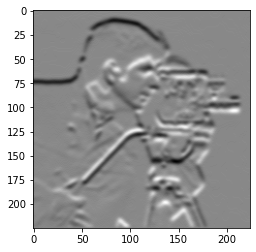

In [11]:
plt.imshow(Ix, cmap='gray')

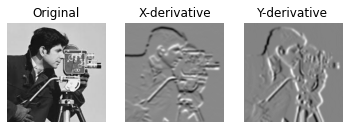

In [12]:
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(132)
plt.imshow(Ix, cmap='gray')
plt.axis('off')
plt.title('X-derivative')
plt.subplot(133)
plt.imshow(Iy, cmap='gray')
plt.axis('off')
plt.title('Y-derivative')
plt.show()

In [13]:
gradient_vec = np.array([Ix[150, 130], Iy[150, 130]])

In [14]:
gradient_vec

array([-3., -4.])

## Derivatives of Gaussian Implementation

In [15]:
def Gx(s, sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    
    Gx = np.zeros((s, s))  # gaussina matrix
    
    for x in range(minX, maxX+1):
        for y in range(minY, maxY+1):
            v = (-x/(2*np.pi*(sigma**4)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gx[x-minX, y-minY] = v  # G[0, 0] = v
    return Gx

In [16]:
def Gy(s, sigma):
    maxX = s//2
    minX = -maxX
    minY = minX
    maxY = maxX
    
    Gy = np.zeros((s, s))  # gaussina matrix
    
    for x in range(minX, maxX+1):
        for y in range(minY, maxY+1):
            v = (-y/(2*np.pi*(sigma**4)))*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
            Gy[x-minX, y-minY] = v  # G[0, 0] = v
    return Gy

In [17]:
gx = Gx(3, 0.5)
gy = Gy(3, 0.5)

In [18]:
gx

array([[ 0.04664039,  0.34462847,  0.04664039],
       [ 0.        ,  0.        ,  0.        ],
       [-0.04664039, -0.34462847, -0.04664039]])

In [19]:
gy

array([[ 0.04664039,  0.        , -0.04664039],
       [ 0.34462847,  0.        , -0.34462847],
       [ 0.04664039,  0.        , -0.04664039]])

In [20]:
img.shape

(225, 224, 3)

In [21]:
img = np.float64(img[:, :, 0])

In [22]:
Ix = cv2.filter2D(img, -1, gx)
Iy = cv2.filter2D(img, -1, gy)

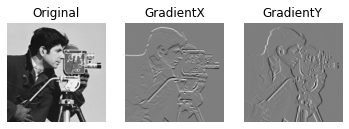

In [23]:
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(132)
plt.imshow(Ix, cmap='gray')
plt.axis('off')
plt.title('GradientX')
plt.subplot(133)
plt.imshow(Iy, cmap='gray')
plt.axis('off')
plt.title('GradientY')
plt.show()

## Gradient Magnitude & Direction

In [24]:
Gmagnitude = np.sqrt(Ix**2 + Iy**2)
Gdirection = np.rad2deg(np.arctan2(Iy, Ix))

In [25]:
Gdirection.min(), Gdirection.max()

(-180.0, 180.0)

In [26]:
Gdirection.shape

(225, 224)

In [27]:
Gmagnitude.min(), Gmagnitude.max()

(1.962615573354719e-16, 125.74349298140103)

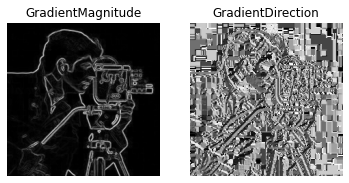

In [28]:
plt.subplot(121)
plt.imshow(Gmagnitude, cmap='gray')
plt.axis('off')
plt.title('GradientMagnitude')
plt.subplot(122)
plt.imshow(Gdirection, cmap='gray')
plt.axis('off')
plt.title('GradientDirection')
plt.show()

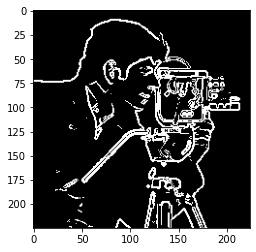

In [29]:
plt.imshow(Gmagnitude>30, cmap='gray')

## Gradient Direction Quantization Implementation

In [30]:
bins = np.array([-180., -135., -90., -45., 0., 45., 90., 135., 180.])
inds = np.digitize(Gdirection, bins)-1  # for replacing by closer magnitude
Gdirection_bin = bins[inds.flatten()].reshape(Gdirection.shape)

In [31]:
i, j = 50, 150
Gdirection[i, j], Gdirection_bin[i, j]  # (actual, closer_value)

(157.3437536434671, 135.0)

In [32]:
A = np.array([180., 134., 179., 135., -33., -180.])
inds = np.digitize(A,bins)-1

In [33]:
bins[inds]

array([ 180.,   90.,  135.,  135.,  -45., -180.])

In [34]:
### Better implementation
A = np.array([180., 134., 179., 135., -33., -180., 12., -12., -170.])
A_bin = 45*(np.round(A/45))

In [35]:
A_bin

array([ 180.,  135.,  180.,  135.,  -45., -180.,    0.,   -0., -180.])

In [36]:
Gdirection_bin = 45*(np.round(Gdirection/45))

In [37]:
i, j = 12, 100
Gdirection[i, j], Gdirection_bin[i, j]  # (actual, closer_value)

(-15.966835661596948, -0.0)

### Non-max Suppression

In [42]:
def NMS(Gmagnitude, Gdirection):
    Gdir_bin = 45 * (np.round(Gdirection/45))
    Gmag_NMS = np.zeros(Gmagnitude.shape)
    numRows, numCols = Gmagnitude.shape[0], Gmagnitude.shape[1]
    a, b = 0., 0.
    for r in range(1, numRows-1):
        for c in range(1, numCols-1):
            angle = Gdir_bin[r, c]
            if angle == 180. or angle ==-180. or angle == 0.0 or angle == -0.0:
                a, b = Gmagnitude[r-1, c], Gmagnitude[r+1, c]
            elif angle == 45. or angle == -135.:
                a, b = Gmagnitude[r+1, c+1], Gmagnitude[r-1, c-1]
            elif angle == 90. or angle == -90.:
                a, b = Gmagnitude[r, c-1], Gmagnitude[r, c+1]
            elif angle == 135. or angle == -45.:
                a, b = Gmagnitude[r-1, c+1], Gmagnitude[r+1, c-1]
            else:
                print('Error')
                return
            if Gmagnitude[r, c] >= a and Gmagnitude[r, c] >= b:
                Gmag_NMS[r, c] = Gmagnitude[r, c]
                
    return Gmag_NMS

In [43]:
Gmag_NMS = NMS(Gmagnitude, Gdirection)

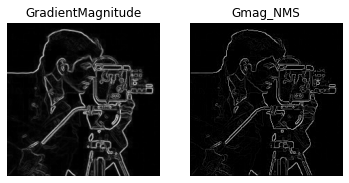

In [44]:
plt.subplot(121)
plt.imshow(Gmagnitude, cmap='gray')
plt.axis('off')
plt.title('GradientMagnitude')
plt.subplot(122)
plt.imshow(Gmag_NMS, cmap='gray')
plt.axis('off')
plt.title('Gmag_NMS')
plt.show()

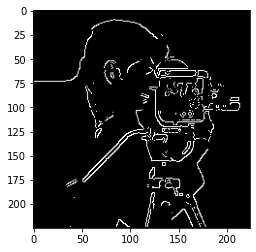

In [45]:
plt.imshow(Gmag_NMS > 50, cmap='gray')

### Hesterysis Thresholding

In [48]:
# pip install scikit-image

     |████████████████████████████████| 13.5 MB 54 kB/s  eta 0:00:01
     |████████████████████████████████| 6.4 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 331 kB/s eta 0:00:01
     |████████████████████████████████| 178 kB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 178 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [49]:
from skimage import filters

In [51]:
L = Gmag_NMS.mean()
H = L + Gmag_NMS.std()
E = filters.apply_hysteresis_threshold(Gmag_NMS, L, H)

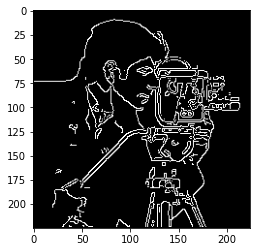

In [52]:
plt.imshow(E, cmap='gray')